<a href="https://colab.research.google.com/github/RohitSen1235/DataAnalysisAndML/blob/main/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [226]:
project_path='/content/drive/My Drive/AI&ML/ImageSimilarity/'
# data_path=project_path+'dataset.zip'

#**Dealing with Zip file**#

In [233]:
import os
x_train=[]
y_train=[]

In [234]:
os.chdir(project_path)

In [235]:
os.listdir()

['Untitled0.ipynb', 'validation', 'training']

In [236]:
os.chdir(project_path+'training')

In [237]:
os.listdir()

['n01443537(goldfish)',
 'n01632777(axolotl)',
 'n02096294(Australian_terrier)',
 'n01669191(box_turtle)',
 'n01806143(peacock)',
 'n01944390(snail)',
 'n01644900(tailed_frog)',
 'n03793489(mouse)',
 'n01518878(ostrich)',
 'n02077923(sea_lion)']

#**Import CV2 for reading and manipulating the images**#

In [238]:
import cv2

#**Individually go into each of the above folders and add the files into X_train and labels to y_train**#

In [239]:
img_rows=64
img_cols=64

for dir in os.listdir():
  # print(dir)
  for pic in os.listdir(dir):
    # print(project_path+'training/'+pic)

    temp=cv2.imread(project_path+'training/'+dir+'/'+pic)
    temp=cv2.resize(temp,(img_rows,img_cols))
    x_train.append(temp)
    y_train.append(dir)

input_shape=(img_rows,img_cols,1)
print(len(x_train),len(y_train))

1300 1300


#**Individually go into each of the above folders and add the files into x_test and labels to y_test**#

In [240]:
x_test=[]
y_test=[]

In [241]:
os.chdir(project_path+'validation/query')

In [242]:
os.listdir()

['n01443537(goldfish)',
 'n01632777(axolotl)',
 'n02096294(Australian_terrier)',
 'n01669191(box_turtle)',
 'n01806143(peacock)',
 'n01944390(snail)',
 'n01644900(tailed_frog)',
 'n03793489(mouse)',
 'n01518878(ostrich)',
 'n02077923(sea_lion)']

In [243]:
# img_rows=64
# img_cols=64

for dir in os.listdir():
  # print(dir)
  for pic in os.listdir(dir):
    # print(project_path+'training/'+pic)

    temp=cv2.imread(project_path+'validation/query/'+dir+'/'+pic)
    temp=cv2.resize(temp,(img_rows,img_cols))
    x_test.append(temp)
    y_test.append(dir)

# input_shape=(img_rows,img_cols,1)

In [247]:
import numpy as np

x_train =np.array(x_train)
x_test=np.array(x_test)

x_train=x_train.shape[0]
x_test=x_test.shape[0]




IndexError: ignored

In [246]:
print(x_train.shape)

AttributeError: ignored

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#**Plotting first 100 images from the training set**#

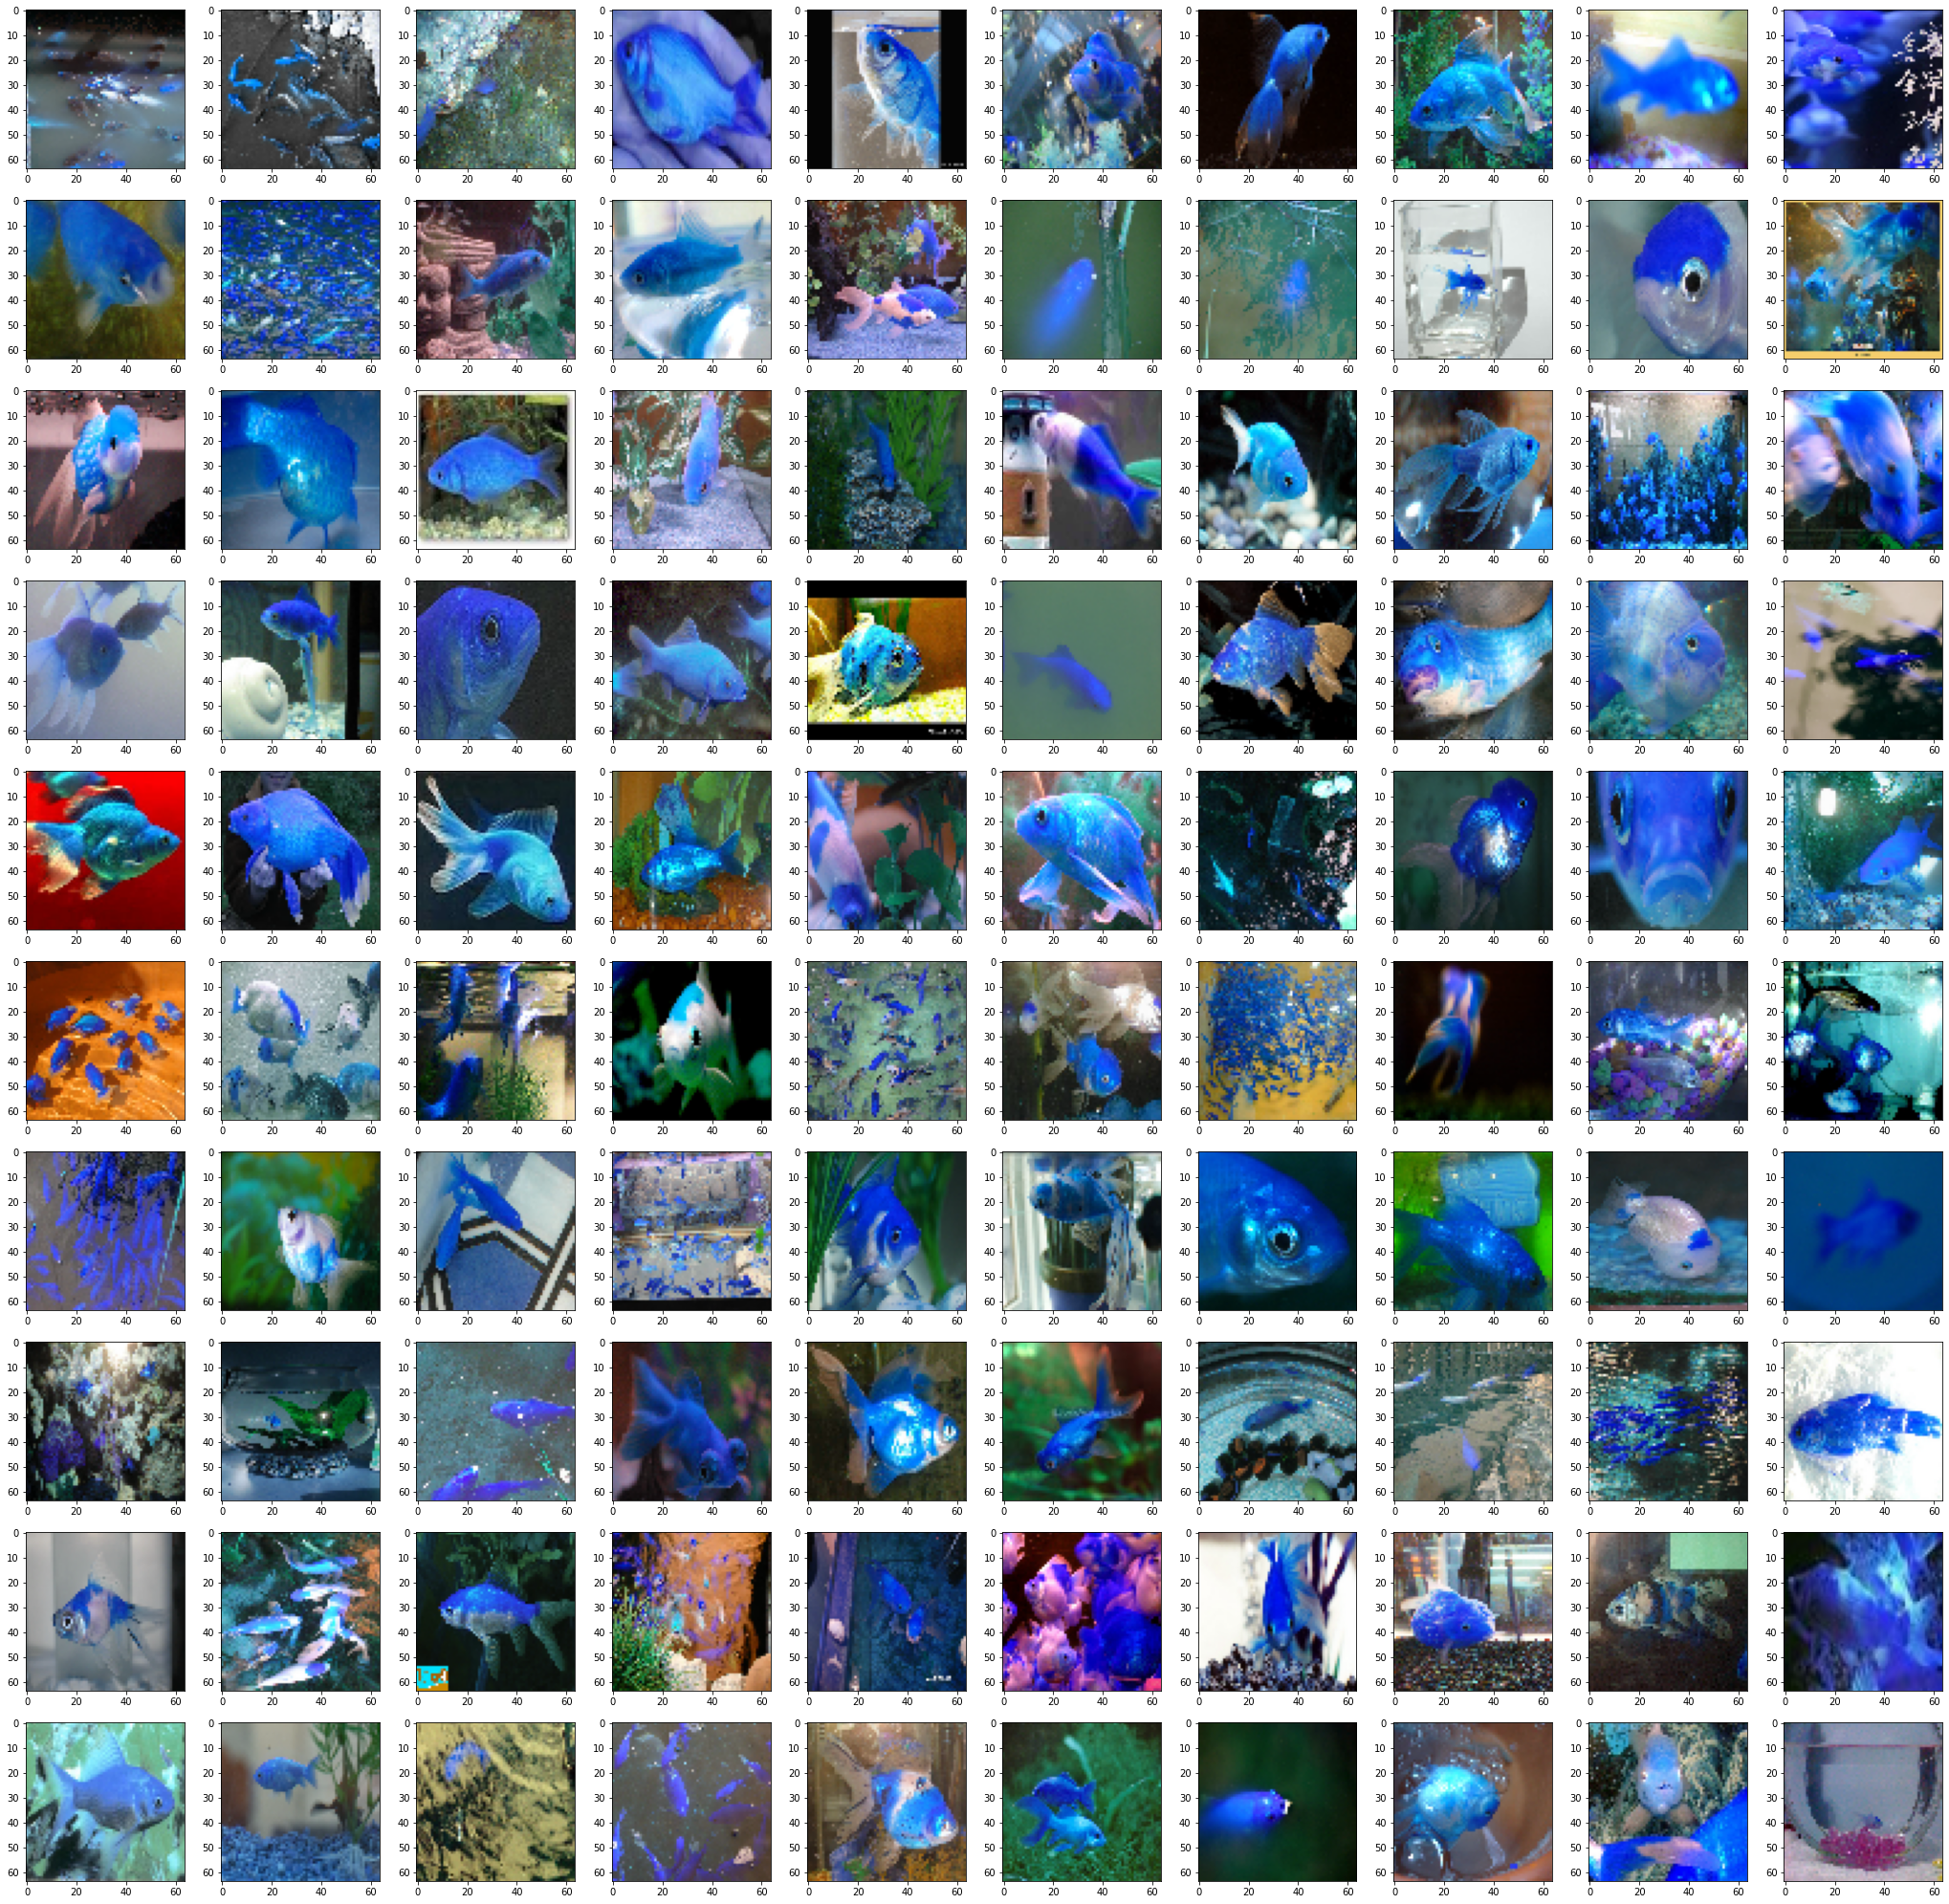

In [ ]:
fig=plt.figure(figsize=(36,36))
columns=10
rows=10
for i in range(0,columns*rows):
  img=x_train[i]
  fig.add_subplot(rows,columns,i+1)
  plt.imshow(img)

plt.show()

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# !pip install Tensorboard

#**Pre processing the dataset**#
###**Keras expects the dataset to be in the format (N_E,H,W,N_C) : numof Examples, Height, Width, numof Channels**###

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

y_train_encoded=le.fit_transform(y_train)
y_test_encoded=le.fit_transform(y_test)


# print(y_train_encoded)

from keras.utils.np_utils import to_categorical   
y_train_categorical=to_categorical(y_train_encoded,10)
y_test_categorical=to_categorical(y_test_encoded,10)
# print(y_categorical[-1])



#**Building the CNN**#

In [ ]:
batch_size=128
num_classes=10
epochs=12

In [ ]:
# initializing the model
model = Sequential()

# add a convolutional layer with 32 filters of size 3x3 and activation function as ReLU
model.add(Conv2D(32,kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))

# add a convolutional layer with 64 filters of size 3x3 and activation function and ReLU
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

# Add a maxpooling layer of size 2x2
model.add(MaxPooling2D(pool_size=(2,2)))

#apply dropout with probability of 0.25
model.add(Dropout(0.25))

#flatten the layer
model.add(Flatten())

#add a fully connected layer with 128 units and activation function as ReLU
model.add(Dense(128,activation='relu'))

# apply Dropout with 0.5 probability
model.add(Dropout(0.5))

# add fully Connected layer with 10 units and activation function as softmax
model.add(Dense(num_classes,activation='softmax'))



##**Setting Optimizer and loss function for training**##

In [ ]:
from keras.optimizers import adam_v2
from keras.losses import categorical_crossentropy

# To use adam optimizer for learning weights with learning rate =0.001
optimizer =adam_v2.Adam(learning_rate=0.001)

model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

#**Training the CNN**#

###**Initializing the Tenserboard callback for visualization of training**###

In [ ]:
#  Importing the tenserboard call back to pass in th emodel.fit function later

from time import time
from keras.callbacks import TensorBoard

tensorboard=TensorBoard(log_dir=".logs/{}".format(time()))

###**Initializing early stopping and model checkpoint callbacks**###

In [ ]:
early_stopping =EarlyStopping(monitor='val_loss',min_delta=0.001,patience=10)

model_checkpoint =ModelCheckpoint('_cnn_checkpoint_{epoch:02d}_loss{val_loss:.0.4f}.h5',
                                  monitor='val_loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=True,
                                  mode='auto',
                                  save_freq=1)

###**Fit the model to dataset**###

In [ ]:
import numpy as np
# Training the dataset and adding the callbacks to the fit function
# Once training starts, results start appearing on the Tensorboard after 1 epoch

model.fit(np.array(x_train),y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(x_test),y_test_categorical),
          callbacks=[tensorboard,early_stopping,model_checkpoint])
          

ValueError: ignored